PHASE 1: THE DETECTIVE WORK ( SETUP & INSPECTION)


# Mini Project 1 – Exploratory Data Analysis

## Introduction

This dataset contains customer analytics data used to understand customer behavior and purchasing patterns.

Each row represents a single customer and includes demographic details, purchasing information, and engagement metrics.

The objective of this analysis is to explore the dataset structure, clean missing data, and identify patterns that can provide business insights.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [19]:
df = pd.read_csv("customer_analytics.csv")
df.head()


,CustomerID,Age,Gender,City,Education,MaritalStatus,AnnualIncome,SpendingScore,YearsEmployed,PurchaseFrequency,OnlineVisitsPerMonth,ReturnedItems,PreferredDevice,LastPurchaseAmount
0,1001,49,Male,Pune,Masters,Single,82953.0,66,23,19,9,2,Laptop,3944
1,1002,44,Male,Pune,PhD,Single,60610.0,56,22,1,23,3,Desktop,3885
2,1003,42,Male,Mumbai,Bachelors,Single,35501.0,44,18,10,29,3,Laptop,3247
3,1004,36,Female,Mumbai,Masters,Married,99312.0,36,10,12,21,3,Mobile,2028
4,1005,23,Male,Pune,Masters,Married,46980.0,56,1,18,9,3,Tablet,1100


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            255 non-null    int64  
 1   Age                   255 non-null    int64  
 2   Gender                255 non-null    object 
 3   City                  255 non-null    object 
 4   Education             243 non-null    object 
 5   MaritalStatus         255 non-null    object 
 6   AnnualIncome          243 non-null    float64
 7   SpendingScore         255 non-null    int64  
 8   YearsEmployed         255 non-null    int64  
 9   PurchaseFrequency     255 non-null    int64  
 10  OnlineVisitsPerMonth  255 non-null    int64  
 11  ReturnedItems         255 non-null    int64  
 12  PreferredDevice       255 non-null    object 
 13  LastPurchaseAmount    255 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 28.0+ KB


In [21]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore,YearsEmployed,PurchaseFrequency,OnlineVisitsPerMonth,ReturnedItems,LastPurchaseAmount
count,255.000000,255.000000,243.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000
mean,1126.941176,37.729412,74499.901235,45.721569,14.682353,11.568627,16.078431,1.858824,2795.07451
std,72.397256,9.767842,43939.855655,17.869522,9.651664,7.077899,7.909536,1.409917,1328.77241
min,1001.000000,21.000000,16062.000000,5.000000,1.000000,1.000000,3.000000,0.000000,566.00000
25%,1064.500000,29.000000,56353.000000,34.500000,6.000000,5.000000,10.000000,1.000000,1542.50000
50%,1128.000000,38.000000,69629.000000,47.000000,15.000000,11.000000,16.000000,2.000000,2705.00000
75%,1190.500000,46.000000,84030.500000,57.500000,23.000000,18.000000,23.000000,3.000000,4001.00000
max,1250.000000,54.000000,474327.000000,95.000000,34.000000,24.000000,29.000000,4.000000,4996.00000


PHASE 2: THE CLEANUP ( DATA PREPROCESSING )

In [22]:
# CHECKING MISSING VALUES
df.isnull().sum()

CustomerID               0
Age                      0
Gender                   0
City                     0
Education               12
MaritalStatus            0
AnnualIncome            12
SpendingScore            0
YearsEmployed            0
PurchaseFrequency        0
OnlineVisitsPerMonth     0
ReturnedItems            0
PreferredDevice          0
LastPurchaseAmount       0
dtype: int64

In [23]:
# HANDLING MISSING VALUES

df.columns

Index(['CustomerID', 'Age', 'Gender', 'City', 'Education', 'MaritalStatus',
       'AnnualIncome', 'SpendingScore', 'YearsEmployed', 'PurchaseFrequency',
       'OnlineVisitsPerMonth', 'ReturnedItems', 'PreferredDevice',
       'LastPurchaseAmount'],
      dtype='object')

In [24]:
# FOR NUMERICAL COLUMNS

df['Age'] = df['Age'].fillna(df['Age'].mean())
df['AnnualIncome'] = df['AnnualIncome'].fillna(df['AnnualIncome'].mean())
df['SpendingScore'] = df['SpendingScore'].fillna(df['SpendingScore'].mean())
df['YearsEmployed'] = df['YearsEmployed'].fillna(df['YearsEmployed'].mean())
df['PurchaseFrequency'] = df['PurchaseFrequency'].fillna(df['PurchaseFrequency'].mean())
df['OnlineVisitsPerMonth'] = df['OnlineVisitsPerMonth'].fillna(df['OnlineVisitsPerMonth'].mean())
df['ReturnedItems'] = df['ReturnedItems'].fillna(df['ReturnedItems'].mean())
df['LastPurchaseAmount'] = df['LastPurchaseAmount'].fillna(df['LastPurchaseAmount'].mean())

In [25]:
# FOR CATEGORICAL COLUMNS

df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['City'] = df['City'].fillna(df['City'].mode()[0])
df['Education'] = df['Education'].fillna(df['Education'].mode()[0])
df['MaritalStatus'] = df['MaritalStatus'].fillna(df['MaritalStatus'].mode()[0])
df['PreferredDevice'] = df['PreferredDevice'].fillna(df['PreferredDevice'].mode()[0])

In [26]:
# REMOVE DUPLICATES

df.duplicated().sum()

5

In [27]:
df = df.drop_duplicates()

## Data Cleaning Decisions

1. Numerical columns such as Age, AnnualIncome, and SpendingScore were filled using the mean to preserve distribution balance.
2. Categorical columns such as Gender and City were filled using the mode since it represents the most frequent category.
3. Duplicate records were removed to ensure accurate and unbiased analysis.

PHASE 3: THE DEEP DIVE ( UNIVARIATE & BIVARIATE ANALYSIS)

UNIVARIATE ANALYSIS


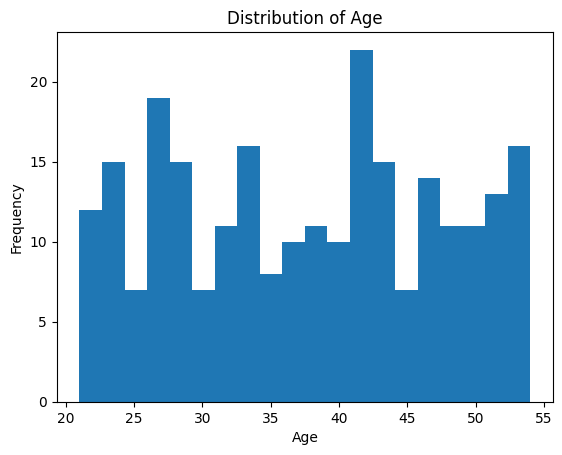

In [28]:
# AGE DISTRIBUTION

plt.figure()
plt.hist(df['Age'], bins=20)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()



# AGE DISTRIBUTION
Most customers fall within the middle-age range.
The distribution shows how customer age varies across the dataset.

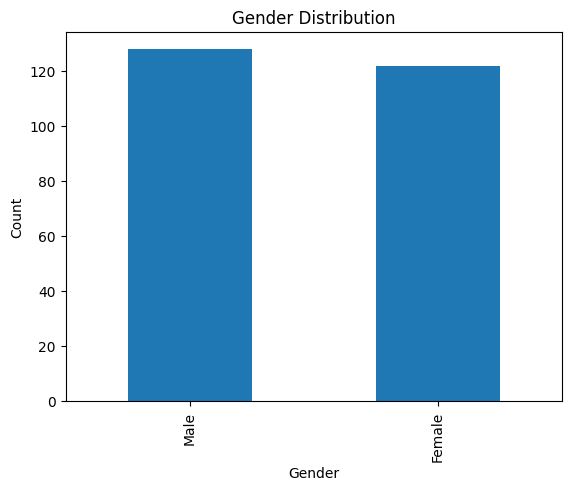

In [29]:
# GENDER DISTRIBUTION

plt.figure()
df['Gender'].value_counts().plot(kind='bar')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# GENDER DISTRIBUTION
The dataset shows the number of male and female customers.
This helps understand the demographic composition of customers.

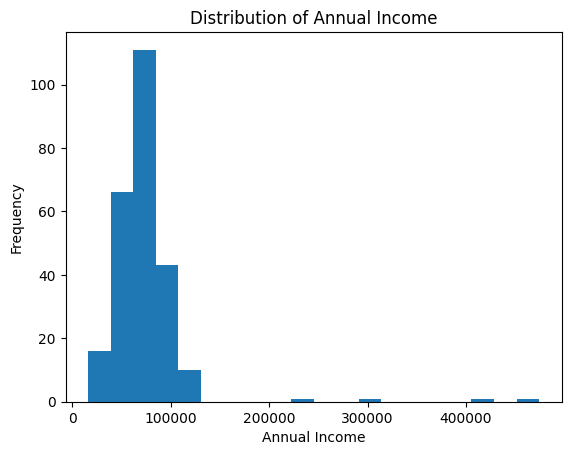

In [30]:
# ANNUAL INCOME DISTRIBUTION

plt.figure()
plt.hist(df['AnnualIncome'], bins=20)
plt.title("Distribution of Annual Income")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.show()

# ANNUAL INCOME DISTRIBUTION
The majority of customers fall within the mid-income range.
A smaller portion of customers belong to high-income segments.

BIVARIATE ANALYSIS

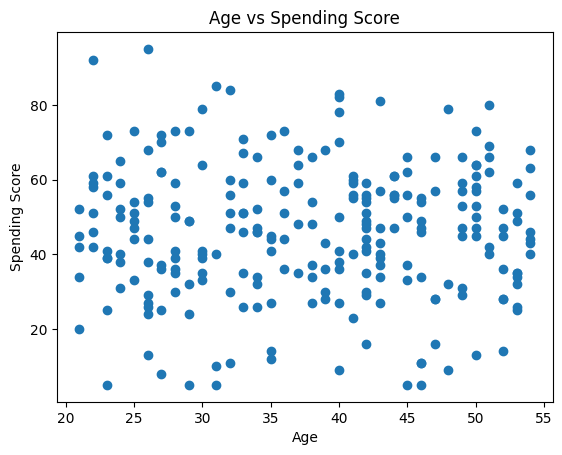

In [31]:
# AGE VS SPENDING SCORE

plt.figure()
plt.scatter(df['Age'], df['SpendingScore'])
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Age vs Spending Score")
plt.show()

# AGE VS SPENDING SCORE
The scatter plot shows the relationship between age and spending behavior.
Younger customers tend to have relatively higher spending scores.

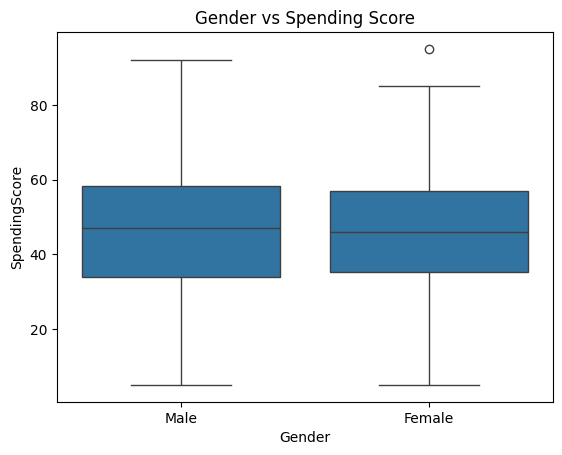

In [32]:
# GENDER VS SPENDING SCORE
plt.figure()
sns.boxplot(x='Gender', y='SpendingScore', data=df)
plt.title("Gender vs Spending Score")
plt.show()

# GENDER VS SPENDING SCORE
The boxplot compares spending patterns between genders.
It highlights differences in median spending scores.

PHASE 4 : THE BIG PICTURE ( MULTIVARIATE & STORYTELLING )

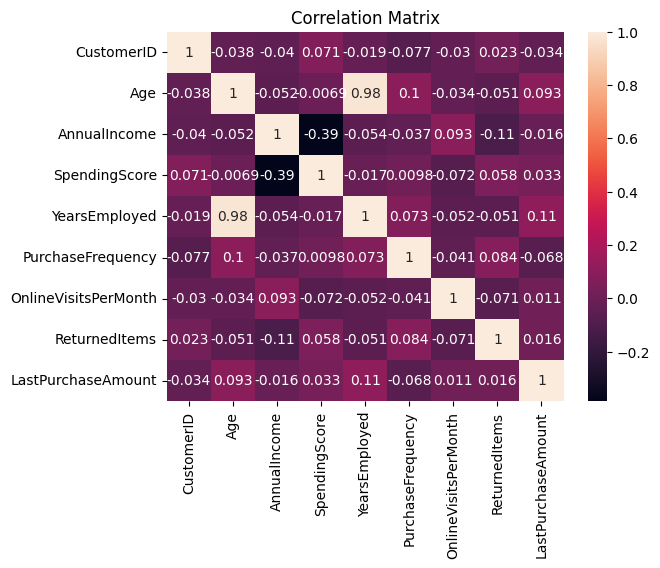

In [33]:
# CORRELATION METRIX

plt.figure()
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")
plt.show()

 # CORRELATION MATRIX
The heatmap shows relationships between numerical variables.
Strong correlations indicate important business insights such as income influencing spending behavior.

# Executive Summary

1. Customer age and spending score show meaningful patterns, indicating target age groups for marketing campaigns.
2. Annual income influences spending behavior, making income-based segmentation valuable.
3. Customer engagement metrics such as purchase frequency and online visits are linked to higher spending scores.

Overall, the dataset provides valuable insights into customer behavior, enabling better marketing strategies and personalized customer targeting.